Data Analysis relationshoip between of NOx emission and concentration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
emission_summary = pd.read_csv('LAEI-2019-Emissions-Summary-including-Forecast.csv')
emission_summary.head(5)

,Year,Grid ID 2019,LAEI 1km2 ID,Easting,Northing,Borough,Zone,Main Source Category,Sector,Source,...,n2o,nh3,nmvoc,nox,pb,pcb,pm10,pm2.5,so2,Emissions Unit
0,2019,218,8137,501500,190500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.046056,0.046056,NaN,tonnes/annum
1,2019,220,8309,501500,189500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.043390,0.043390,NaN,tonnes/annum
2,2019,222,8481,501500,188500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.042990,0.042990,NaN,tonnes/annum
3,2019,224,8653,501500,187500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.044633,0.044633,NaN,tonnes/annum
4,2019,226,8825,501500,186500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.033455,0.033455,NaN,tonnes/annum


In [3]:
unqiue_data = emission_summary['Year'].unique()
unqiue_data

array([2019])

In [4]:
coords_dataset2 = emission_summary.rename(columns={'Easting': 'x', 'Northing': 'y'})
emission_summary.shape

(143976, 30)

In [10]:
nox_sum_by_location = coords_dataset2.groupby(['x', 'y','Borough','Zone'], as_index=False)['nox'].sum()
coords_dataset2.head(5)

,Year,Grid ID 2019,LAEI 1km2 ID,x,y,Borough,Zone,Main Source Category,Sector,Source,...,n2o,nh3,nmvoc,nox,pb,pcb,pm10,pm2.5,so2,Emissions Unit
0,2019,218,8137,501500,190500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.046056,0.046056,NaN,tonnes/annum
1,2019,220,8309,501500,189500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.043390,0.043390,NaN,tonnes/annum
2,2019,222,8481,501500,188500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.042990,0.042990,NaN,tonnes/annum
3,2019,224,8653,501500,187500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.044633,0.044633,NaN,tonnes/annum
4,2019,226,8825,501500,186500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.033455,0.033455,NaN,tonnes/annum


In [11]:
nox_sum_by_location.shape

(3457, 5)

In [12]:
conc_nox = pd.read_csv('laei_LAEI2019v3_CorNOx15_NOx.csv')
conc_nox.head(5)

,x,y,conc
0,519100,203440,37.54391
1,519120,203440,40.60276
2,519140,203440,47.19806
3,519160,203440,43.32369
4,519180,203440,39.57808


In [13]:
merged_data = pd.merge(nox_sum_by_location, conc_nox, on =['x','y'], how= 'inner')
merged_data

,x,y,Borough,Zone,nox,conc
0,501500,170500,Non GLA,Non GLA,32.107815,39.31387
1,502500,167500,Non GLA,Non GLA,27.472103,27.18754
2,502500,168500,Non GLA,Non GLA,2.529384,25.55331
3,502500,169500,Non GLA,Non GLA,2.150501,25.95260
4,502500,170500,Non GLA,Non GLA,4.366657,27.37346
...,...,...,...,...,...,...
3307,560500,186500,Non GLA,Non GLA,0.023818,20.91594
3308,560500,187500,Havering,Outer,0.438973,20.80048
3309,560500,187500,Non GLA,Non GLA,0.513602,20.80048
3310,561500,185500,Havering,Outer,0.831419,20.23348


<function matplotlib.pyplot.show(close=None, block=None)>

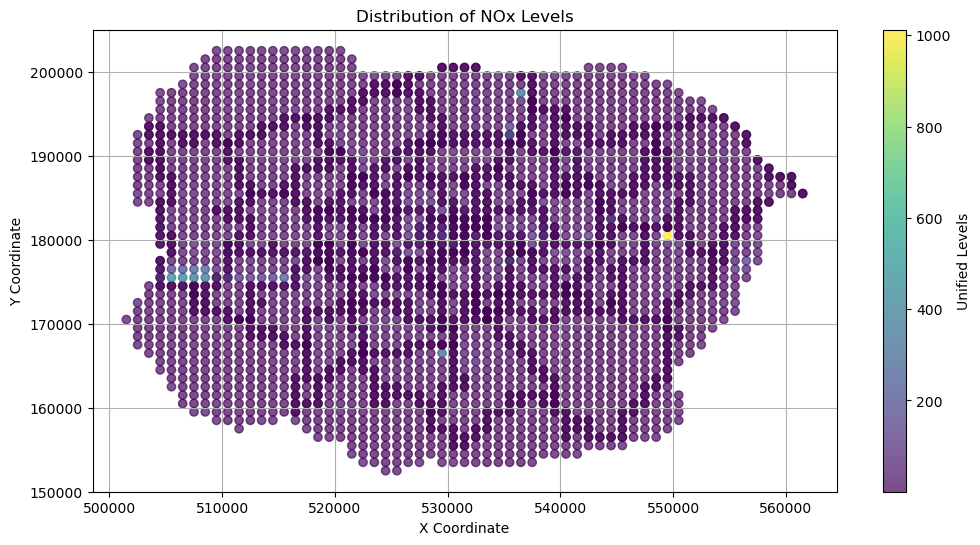

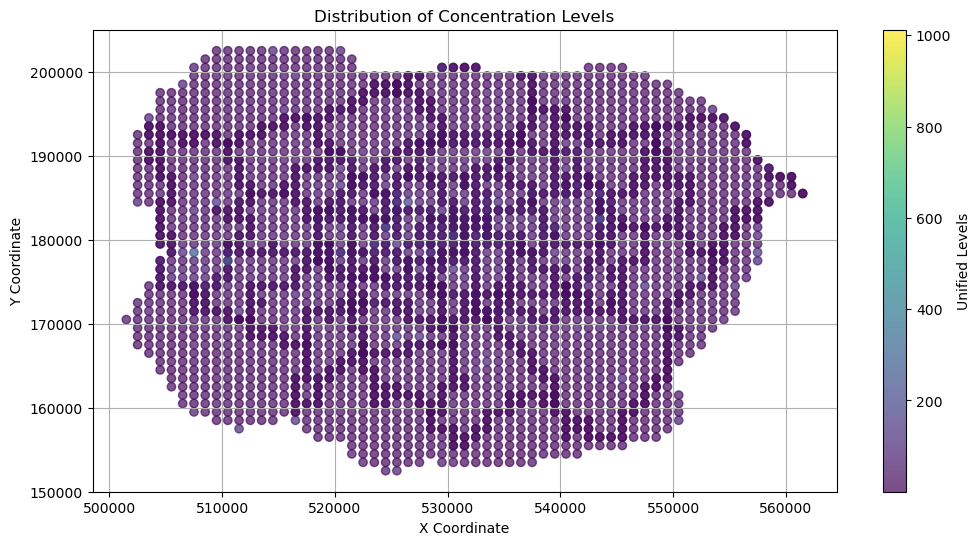

In [20]:
commom_min = min(merged_data['nox'].min(),merged_data['conc'].min())
common_max = max(merged_data['nox'].max(),merged_data['conc'].max())

color_nor = np.linspace(commom_min, common_max, 10)
# Plot for NOx Emission Level
plt.figure(figsize = (12,6))
scatter_nox = plt.scatter(merged_data['x'], merged_data['y'], c=merged_data['nox'], cmap ='viridis', vmin=commom_min, vmax=common_max, alpha= 0.7)
plt.colorbar(scatter_nox, label='Unified Levels')
plt.title('Distribution of NOx Levels')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show

# Plot for Concentration Level
plt.figure(figsize = (12,6))
scatter_conc = plt.scatter(merged_data['x'], merged_data['y'], c=merged_data['conc'], cmap ='viridis', vmin=commom_min, vmax=common_max, alpha= 0.7)
plt.colorbar(scatter_conc, label='Unified Levels')
plt.title('Distribution of Concentration Levels')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show